### 1.原理
借助于最近邻分类(KNN)的思想，异常样本也可以这样考虑：如果某样本离它最近的$k$个样本距离之和越大，那么它越有可能是异常点。这便是KNN用于异常检测的主要思想...

### 2.代码实现

封装在ml_model.outlier_detect中...

In [1]:
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from ml_models.outlier_detect import KNN

In [2]:
#造数据
X, _ = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=3,
                           n_clusters_per_class=1, weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=42)

In [3]:
#训练
knn = KNN()
score = knn.fit_transform(X)

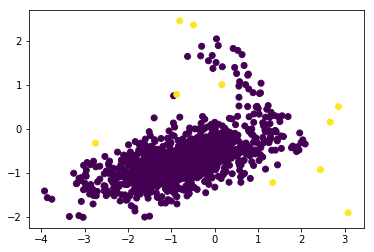

In [4]:
#预测
import numpy as np
thresh=np.percentile(score,99)#前1%设置为异常值
plt.scatter(x=X[:, 0], y=X[:, 1], c=score > thresh)
plt.show()

### 3.分析

这里主要对KNN的思路做介绍，对于大量数据，KNN难以胜任，如果有$N$个样本，直接暴力训练（两两计算距离）的复杂度高达$O(N^2)$，利用其它数据结构进行优化，比如kd树，平均的时间复杂度也达到了$O(Nlog N)$